# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [60]:
import numpy as np

# Autoreload modules when code is run.
%load_ext autoreload
%autoreload 2

# Import class
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In order to illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$, we solve the model discretely for different combinations of $\alpha$ and $\sigma$ and print the outputs as a list.  

In [62]:
# Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# Create an empty list
par_list = []

# Loop over each value of alpha
for a in model.par.alpha_vec:

    # Sets alpha value in the model instance
    model.par.alpha = a

    # Loop over each value of sigma
    for s in model.par.sigma_vec:

        # Sets sigma value in the model instance
        model.par.sigma = s

        # Solves the model and appends the values to the list
        par_list.append(model.solve_discrete())

# Iteriates over 9 parameter values
for i in range(9):

    # Gets parameter values for the i-th iteration
    parameters = par_list[i]

    # Prints the ratio of FH and HM and the corresponding alpha and sigma values
    with np.errstate(all="ignore"): print(f' HF/HM = {parameters[2]:.3} for alpha = {parameters[4]} and sigma = {parameters[5]}')    

 HF/HM = 0.545 for alpha = 0.25 and sigma = 0.5
 HF/HM = 0.308 for alpha = 0.25 and sigma = 1
 HF/HM = 0.214 for alpha = 0.25 and sigma = 1.5
 HF/HM = 1.0 for alpha = 0.5 and sigma = 0.5
 HF/HM = 1.0 for alpha = 0.5 and sigma = 1
 HF/HM = 1.0 for alpha = 0.5 and sigma = 1.5
 HF/HM = 1.83 for alpha = 0.75 and sigma = 0.5
 HF/HM = 3.25 for alpha = 0.75 and sigma = 1
 HF/HM = 4.67 for alpha = 0.75 and sigma = 1.5


The results show the ratio of `HF` to `HM` for different combinations of `alpha` and `sigma` parameters. These ratios indicate the relative differences in hours worked at home by males and females for each combination of parameter values.

When alpha increases in the household utility function the weight of the females utility increases relative to the males. This implies that the males specializes more in market work while females specializes more in home production because females becomes more productive in the home production relative to males. As a result, HF increases while HM decreases which entails that $\frac{H_F}{H_M}$ increases.

When sigma increases the elasticity of substitution becomes greater. When alpha is low, female are less productive at home than male. The higher sigma is, the easier it is for the male to take on more house work relative to the female. Therefore, when alpha is low and sigma increases, HF/HM decreases. When alpha is equal to 0.5, the male and female are equally productive. Therefore, they do not have incentives to allocate housework unequally no matter how easy it is to allocate the hours (which depends on sigma). And vice versa when alpha is low.

# Question 2

In this section, we will plot $\log(\frac{H_F}{H_M})$ against $\log(\frac{w_F}{w_M})$ for $w_F \in [0.8, 0.9, 1.0, 1.1, 1,2]$ 

/Users/apple/projects-2023-iim/inauguralproject/HouseholdSpecializationModel.py:69: RuntimeWarning: invalid value encountered in reciprocal
  Q = C**par.omega*H**(1-par.omega)


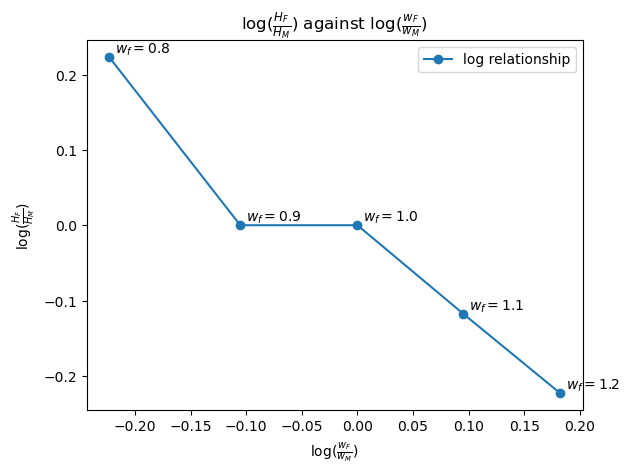

In [58]:
# Sets the value of the parameters -
model.par.alpha = 0.5
model.par.sigma = 1

# Create an empty list
par_list_2 = []

# Iterate over each value of wF
for wF in model.par.wF_vec:
    
    # Set the wage ratio of women to men 
    model.par.wF = wF

    # Solve the model 
    par_list_2.append(model.solve_discrete())

# Create an empty list
lnHFHM_list = []

# Iteriates over 5 parameter values
for i in range(5):

    # Gets parameter values for the i-th iteration
    parameters = par_list_2[i]

    # Extract the natural logarithm 
    lnHFHM = parameters[3]

    # Add the natural logarithm to ´lnHFHM_list´
    lnHFHM_list.append(lnHFHM)

# Plot log H_F/H_M against log w_F/w_M for different w_F walues
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.par.lnwFwH_vec, lnHFHM_list, label='log relationship', marker = "o")

# Create labels in the plot 
ax.set_title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$')
ax.set_xlabel(rf'$\log (\frac{{w_F}}{{w_M}})$')
ax.set_ylabel(rf'$\log (\frac{{H_F}}{{H_M}})$')
ax.legend(loc='upper right');
for x, y in zip(model.par.lnwFwH_vec, lnHFHM_list):
    ax.annotate(r'$w_f=${:.1f}'.format(np.exp(x)), xy= (x+0.005,y+0.005))

The plot shows the relationship between the log of the relative wage for females compared to males (x-axis) and the log of the relative hours worked from home by females compared to males (y-axis).

The plot indicates a negative relationship between the log of the relative wage for females and the log of the relative hours worked at home by females. This suggests that as the relative wage for females increases, the relative hours worked at home by females decreases. This result is expected as a relative higher wage for females will create an incentive for females to work rather than working in the household. Furthermore we observe that when $\log (\frac{{w_F}}{{w_M}}) = 0$, the wage for males and females are equal. 

# Question 3

In this section, we will plot $\log(\frac{H_F}{H_M})$ against $\log(\frac{w_F}{w_M})$ for $w_F \in [0.8, 0.9, 1.0, 1.1, 1,2]$ assuming that the choice set is continuous, i.e. $L_M, L_F, H_M, H_F \in [0,24]$

The problem in question 3 is similar to the problem in question 2. However, the choice set of time use is now continous, meaning that they do not have to work in 30 minute intervals. We use the solver SLSQP where we optimize the utility s.t. to the bounds and constraints given in the assignment. Then, we plot the relative log hours working at home against log relative wages for different female wages wF.

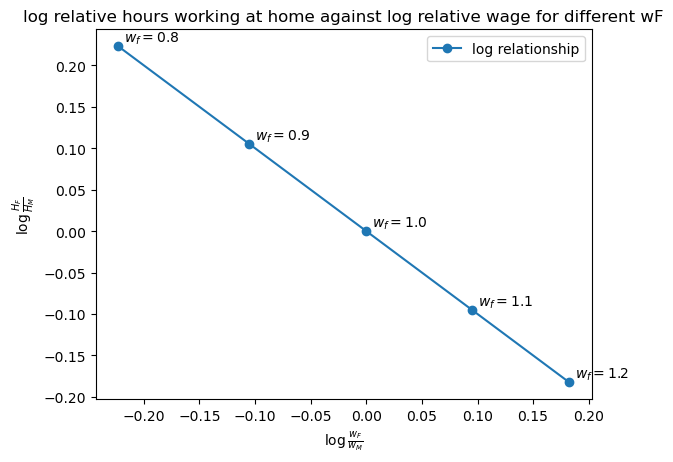

In [57]:
# # Sets the value of the parameters
model.par.alpha = 0.5
model.par.sigma = 1

# Create an empty list
lnHFHM_Q3 = []

# Iteriates over 5 parameter values
for i in range(5):

    # Gets parameter values for the i-th iteration
    model.par.wF = model.par.wF_vec[i] 

    # Add the natural logarithm to ´lnHFHM_Q3´
    lnHFHM_Q3.append(model.solve())

# Plot log H_F/H_M against log w_F/w_M for different w_F walues
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.par.lnwFwH_vec, lnHFHM_Q3,  label='log relationship', marker = "o")

# Create labels in the plot 
ax.set_title('log relative hours working at home against log relative wage for different wF')
ax.set_xlabel(rf'$\log \frac{{w_F}}{{w_M}}$')
ax.set_ylabel(rf'$\log \frac{{H_F}}{{H_M}}$')
ax.legend(loc='upper right'); # Activate legend (uses the labels in ax.plot())
for x, y in zip(model.par.lnwFwH_vec, lnHFHM_Q3):
    ax.annotate(r'$w_f=${:.1f}'.format(np.exp(x)), xy= (x+0.005,y+0.005))

The plot shows now the relationship between the log of the relative wage for females compared to males (x-axis) and the log of the relative hours worked from home by females compared to males (y-axis) when the choice set is continious.

The plot indicates a negative relationship between the log of the relative wage for females and the log of the relative hours worked at home by females. This suggests that as the relative wage for females increases, the relative hours worked at home by females decreases. This result is expected as a relative higher wage for females will create an incentive for females to work rather than working in the household. 

# Question 4

In this section we are estimating the values of $\alpha$ and $\sigma$ that minimizes $(\beta_0 - \hat{\beta_0})^2 + (\beta_1-\hat{\beta_1})^2$.

In [56]:
from scipy import optimize

# Define the objective function
def objective_func(par): 
    alpha, sigma = par
    model = HouseholdSpecializationModelClass()
    model.par.alpha = alpha
    model.par.sigma = sigma
    beta0_true = 0.4
    beta1_true = -0.1

    # Iteriates over 5 parameter values
    for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve_continous()
        model.sol.HF_vec[i] = results.HF
        model.sol.HM_vec[i] = results.HM

    # Runs a regression 
    model.run_regression()
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1

    # Returns the sum
    return ((beta0_true - beta0)**2 + (beta1_true - beta1)**2)

# Guess and bounds 
par_guess = [0.5,1.0]
bounds = ((0,1),(0,4))

# Print the rsults 
result = optimize.minimize(objective_func, par_guess, bounds=bounds, method = "Nelder-Mead")
x = (result.x[0],result.x[1])
print(f'Optimal values are alpha={result.x[0]:.3f} and sigma={result.x[1]:.3f}')
print(f'The squared deviation from data moments is in this case: {objective_func(x)}')



/Users/apple/projects-2023-iim/inauguralproject/HouseholdSpecializationModel.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  else:
/Users/apple/projects-2023-iim/inauguralproject/HouseholdSpecializationModel.py:65: RuntimeWarning: invalid value encountered in double_scalars
  else:


Optimal values are alpha=0.988 and sigma=0.091
The squared deviation from data moments is in this case: 1.2242221758960564e-09


In [52]:
alphas = np.linspace(0.90,0.99,20)
sigmas = np.linspace(0.05,0.1,20)

func_vec = [] 
# Loop over alpha and sigma values 
for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        model = HouseholdSpecializationModelClass() 
        model.par.alpha = alpha
        model.par.sigma = sigma 
        model.solve_wF_vec() 
        model.run_regression()
        func_value = ((0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2)
        if func_value > 0:
            func_vec.append(func_value)

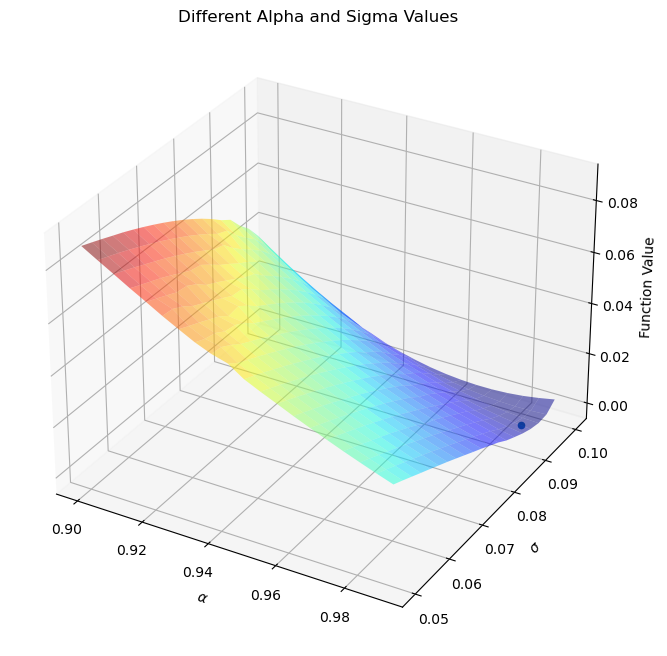

In [53]:
# Sets the length of the alpha and sigma vector the same as func_vec
func_vals = np.array(func_vec).reshape(len(alphas), len(sigmas)) 

# Creates grid of alpha and sigma values 
alpha_grid, sigma_grid = np.meshgrid(alphas, sigmas)

# 3D plot
fig = plt.figure(figsize=(10,8)) 

#Making the plot 3d
ax = plt.axes(projection='3d') 
ax.plot_surface(alpha_grid, sigma_grid, func_vals, cmap='jet', alpha = 0.50) 
ax.scatter([0.988], [0.091], [(0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2]) 
ax.set_xlabel(r'$\alpha$') 
ax.set_ylabel(r'$\sigma$') 
ax.set_zlabel('Function Value') 
ax.set_title('Different Alpha and Sigma Values') 
plt.show() 

$\beta_0$ is the differne in log hours working at home for men and women. When the wage is equal for both sexes ($\frac{wF}{wM}=1$), then $\beta_0$ = $log\frac{H_F}{H_M}$ = 0.4, which means that the women spend more hours doing work in the household compared to the man.


$\beta_1$ is how a change in the relative change the relative wages changes the ratio of hours worked at home between men and women. Siminski and Yetsenga (2022) find that $\beta_1 = -0.1$ meaning ex. a 1% change in the change in the relative wage (to the womans advantage) leads to only a 0.1 % decrease for hours worked at home.

For our model to fit with Siminski and Yetsenga (2022) findings we find that $\alpha = 0.988$ meaning that men are way more productive in working in the market while the woman is most productive at home. Furthermore, $\sigma = 0.091$ meaning the elasticity of substituiton is relatively strong, so even if the women becomes more productive in market work, the rate of substituion would be relatively low.
Overall this means that men will take on almost all of the work in the market while the woman takes in almost all of the housework.

# Question 5

In this section we suggest and implement an extension of the Household Specialization Model, and analyze whether er not it can help match the data when $\alpha$ = 0.5

ADD CONCISE CONLUSION.